<a href="https://colab.research.google.com/github/ShubhangiSRG24/DataAnalytics_Projects/blob/main/DataAnalytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *TAKENMIND GLOBAL DATA ANALYTICS INTERNSHIP PROOF OF CONCEPT PROJECT*

---



### Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [103]:
excelfile = pd.ExcelFile("TakenMind_casestudy.xlsx")

In [104]:
exist = excelfile.parse("Existing employees")
left = excelfile.parse("Employees who have left")

In [105]:
exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [106]:
exist['salary']

0         low
1         low
2         low
3         low
4         low
         ... 
11423    high
11424    high
11425    high
11426    high
11427     low
Name: salary, Length: 11428, dtype: object

In [107]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


### Data Preprocessing

This stage involve preparing the data and analyzing the data.

In [108]:
left['promotion_last_5years'] = left['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
exist['promotion_last_5years'] = exist['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
left['Work_accident'] = left['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")
exist['Work_accident'] = exist['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")

## Univariant Analysis of both Employees that Left and those Existing

### Salary

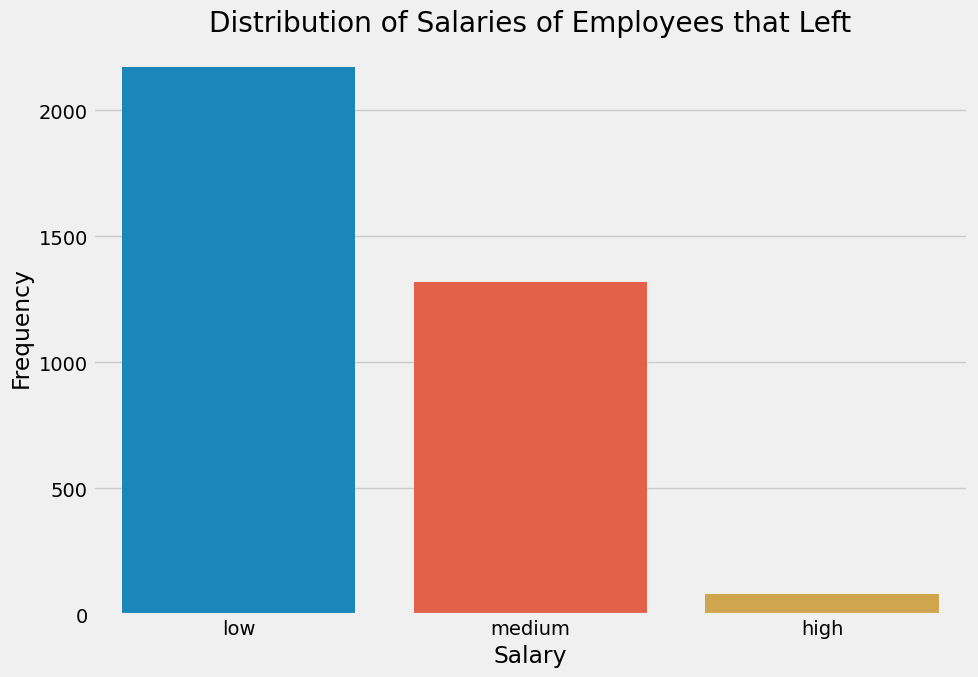

In [109]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
sns.countplot(x='salary', data=left)
plt.title("Distribution of Salaries of Employees that Left")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

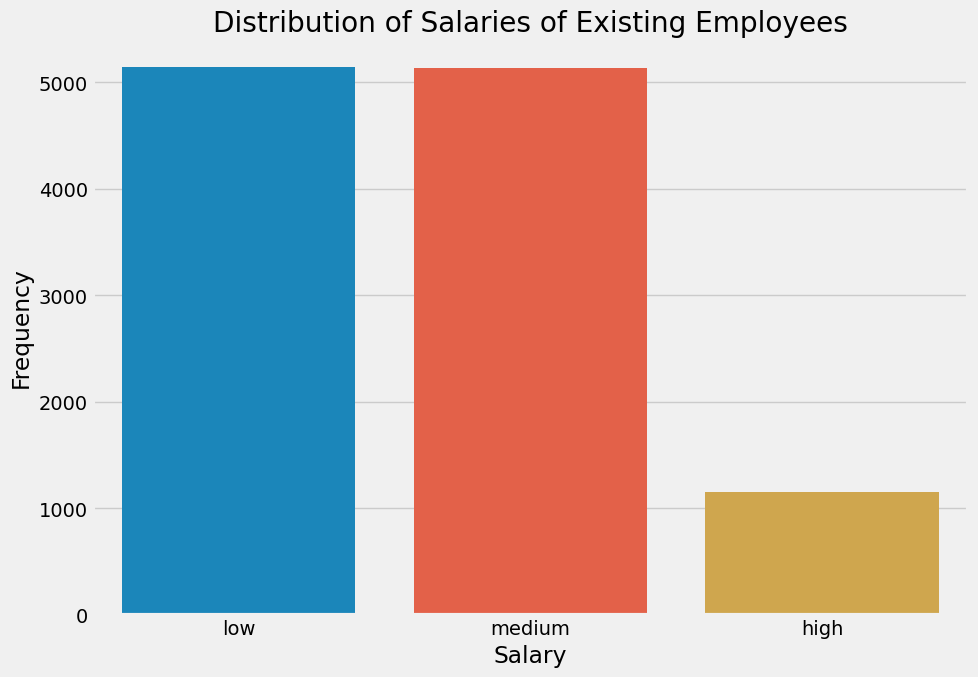

In [110]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
sns.countplot(data=exist, x='salary')
plt.title("Distribution of Salaries of Existing Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

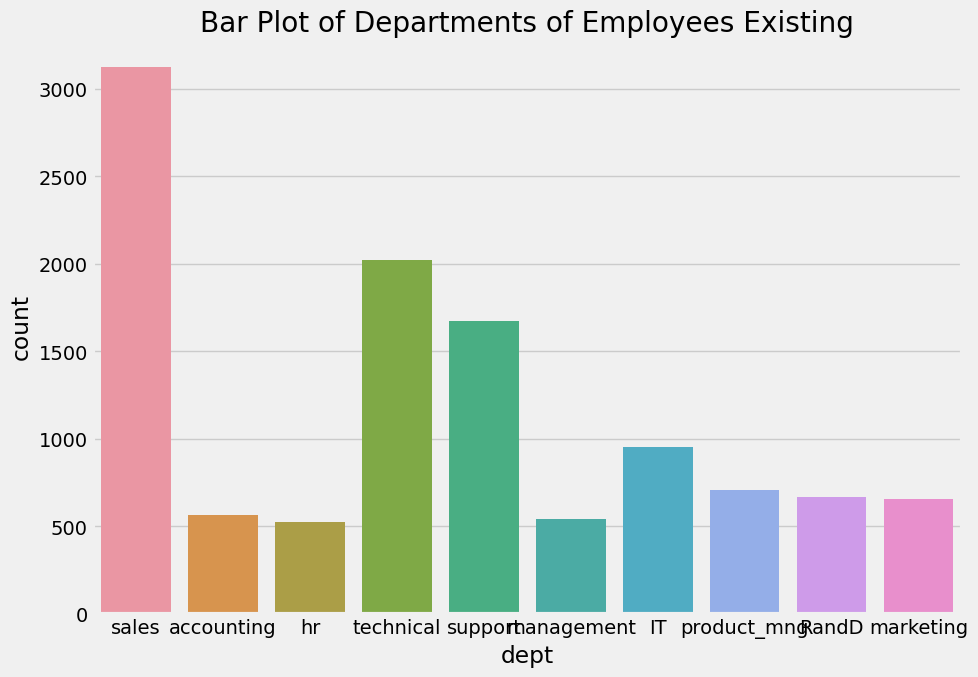

In [111]:
plt.figure(figsize=(10,7))
sns.countplot(data=exist, x='dept')
plt.title("Bar Plot of Departments of Employees Existing")
plt.tight_layout()

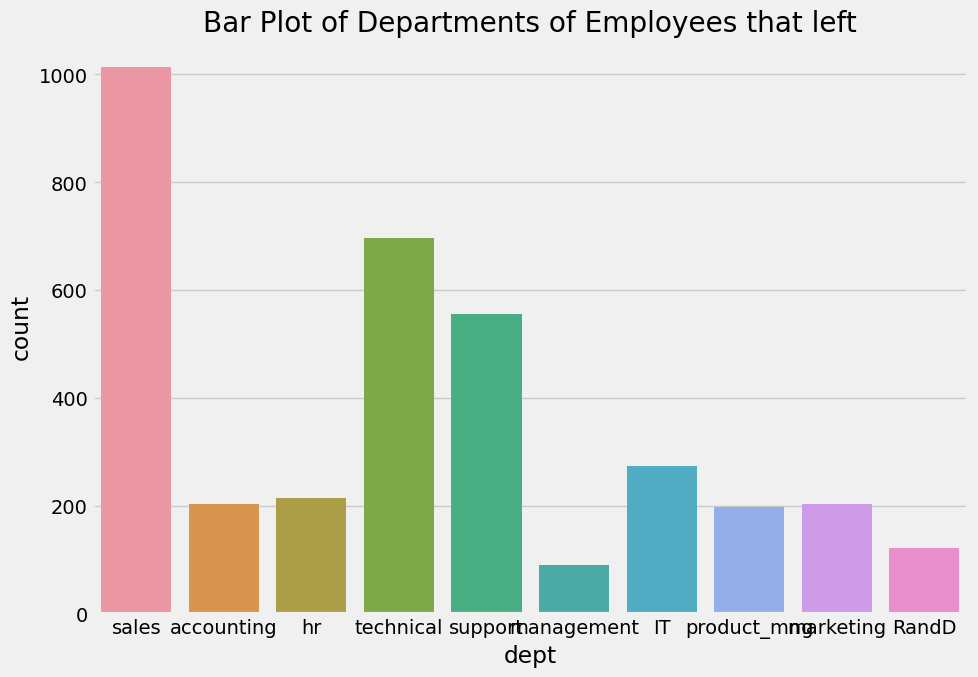

In [112]:
plt.figure(figsize=(10,7))
sns.countplot(data=left, x='dept')
plt.title("Bar Plot of Departments of Employees that left")
plt.tight_layout()


### Satisfaction Level

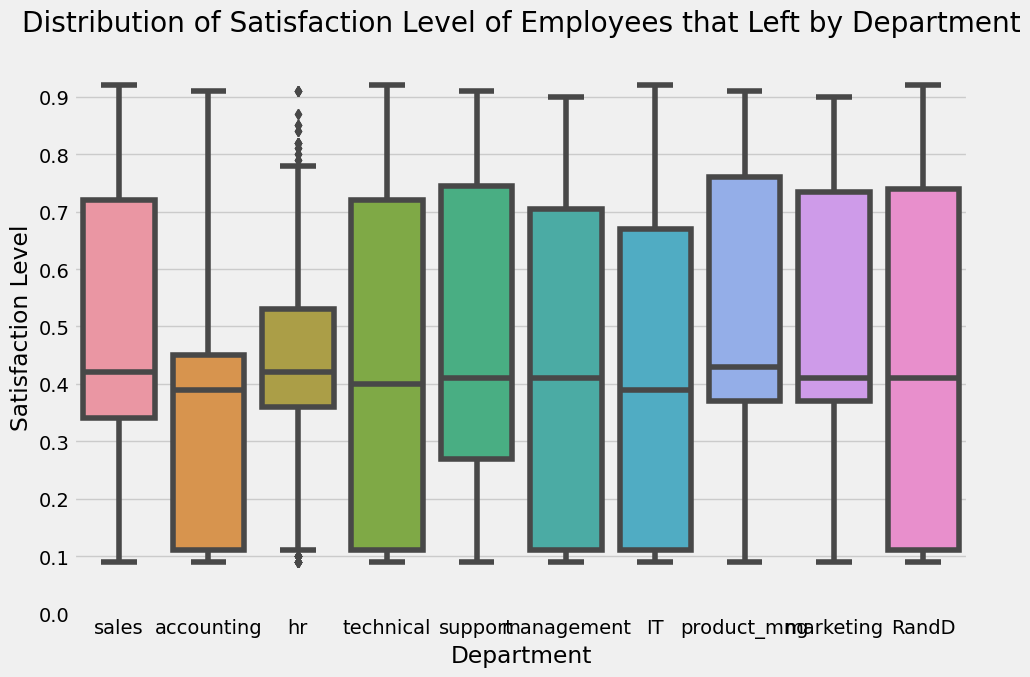

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Distribution of Satisfaction Level of Employees that Left by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

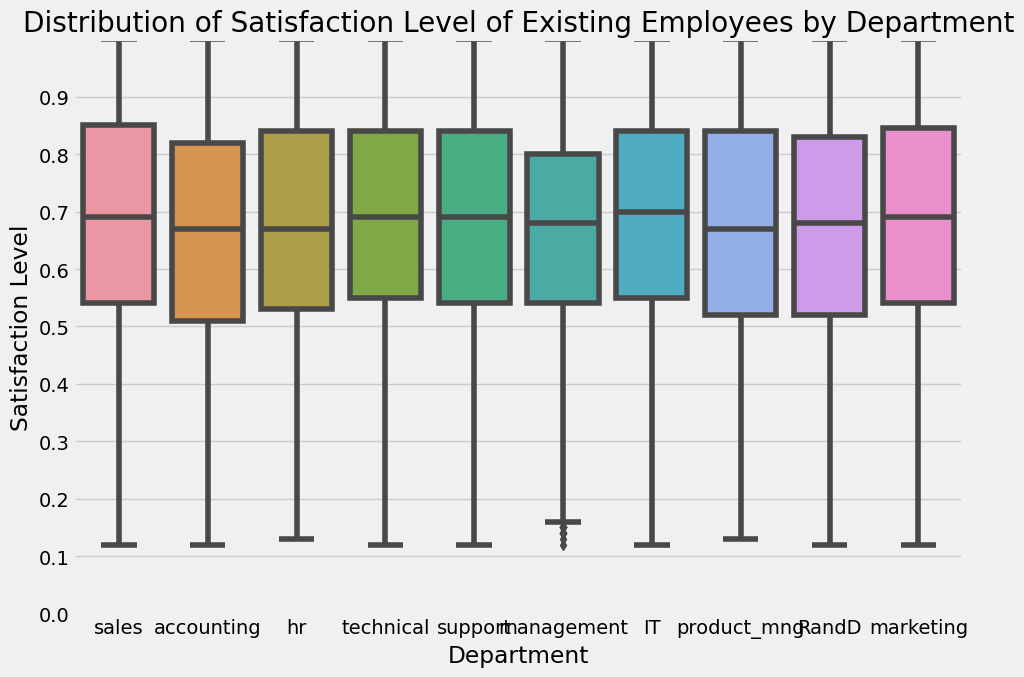

In [114]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=exist)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Distribution of Satisfaction Level of Existing Employees by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()


From the Box plot of both `Existing Employees and those that left` we can discover the following insights
1. The median Satisfaction level of employees that left is between 40-50%
2. The median Satisfaction level of employees existing is between 65-70%

To further strengthen this discovery, a further analysis was done on satisfaction level

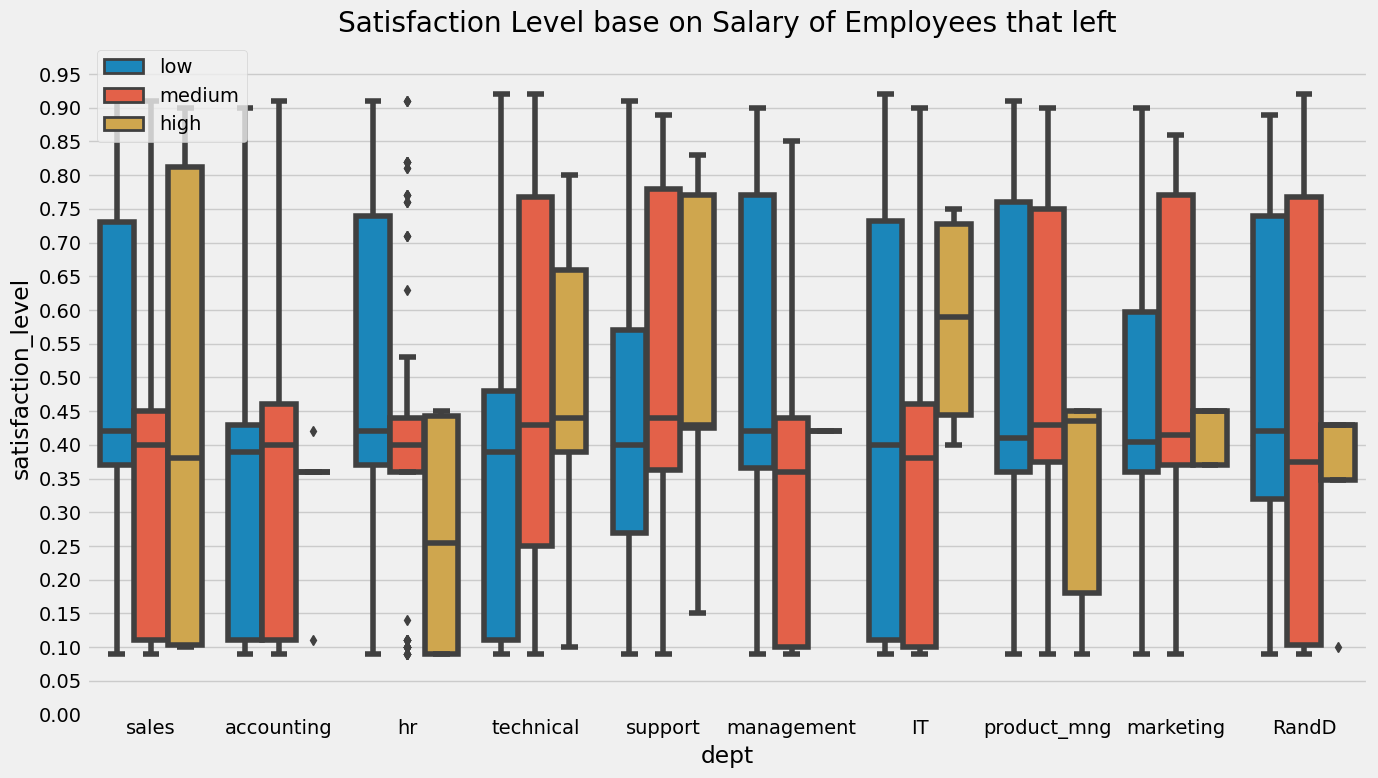

In [115]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',hue='salary',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level base on Salary of Employees that left")
plt.tight_layout()
plt.legend(loc=2)

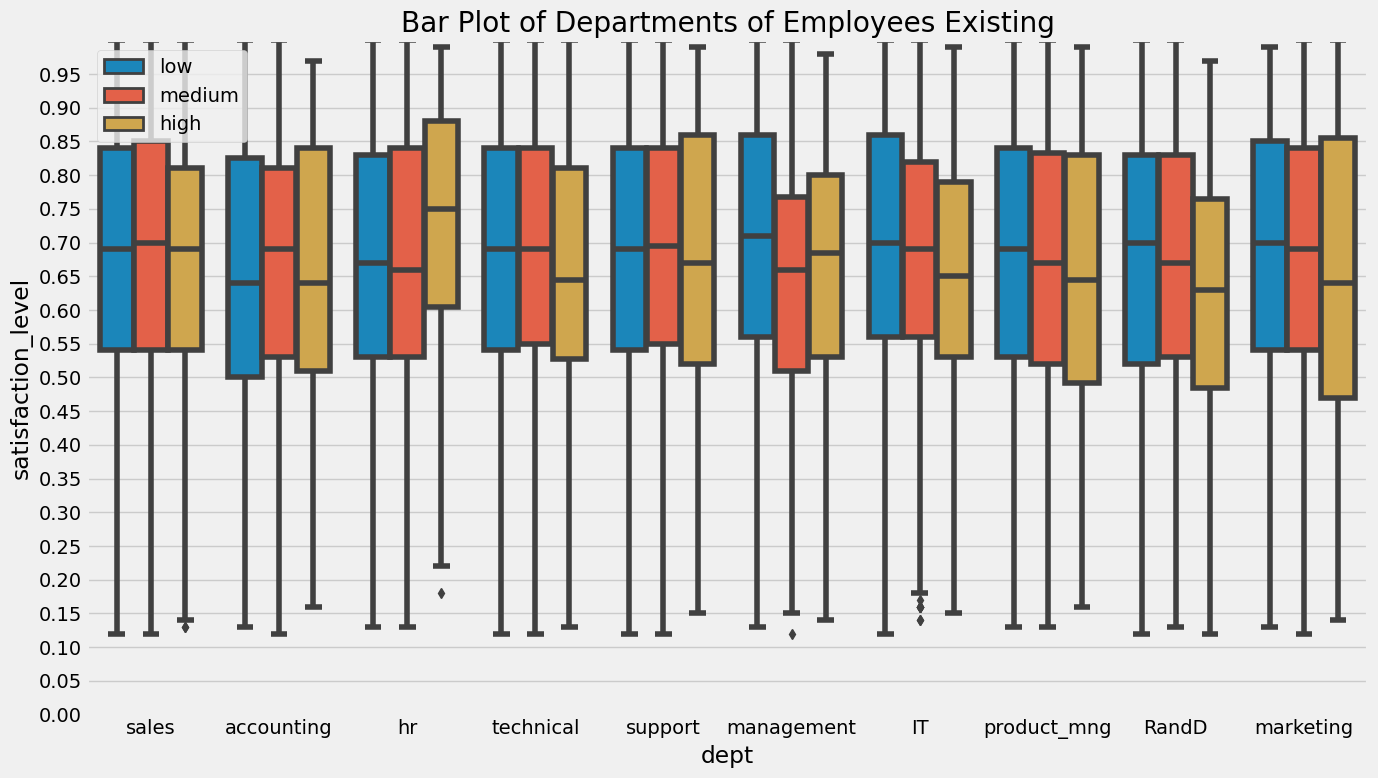

In [116]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',hue='salary',data=exist)
plt.title("Bar Plot of Departments of Employees Existing")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

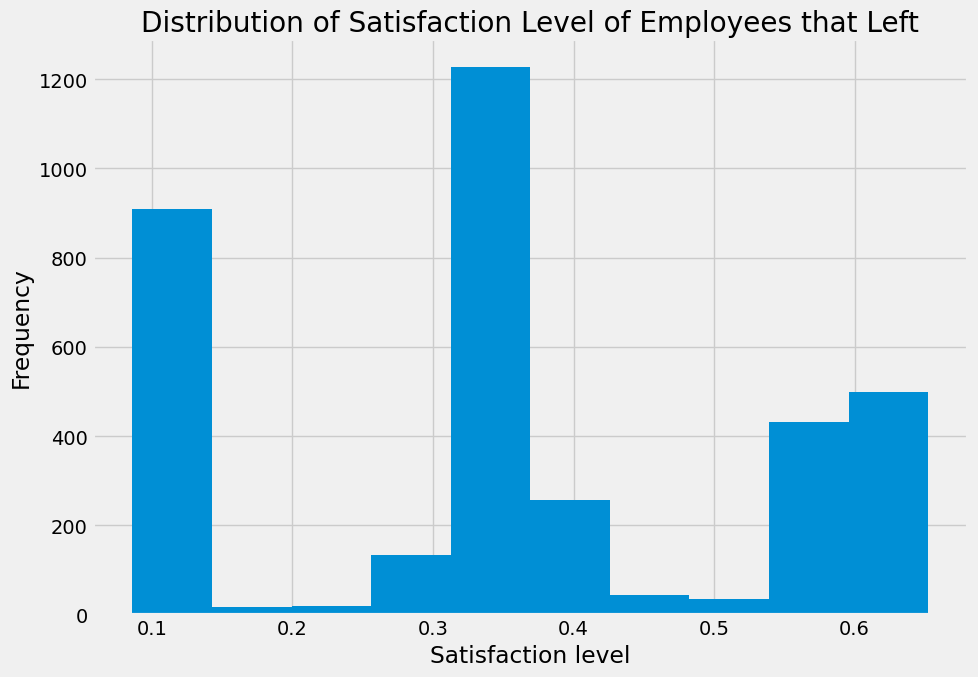

In [117]:
plt.figure(figsize=(10,7))
(np.log(left['satisfaction_level'] + 1)).plot.hist()
plt.title("Distribution of Satisfaction Level of Employees that Left")
plt.xlabel('Satisfaction level')
plt.ylabel("Frequency")
plt.tight_layout()

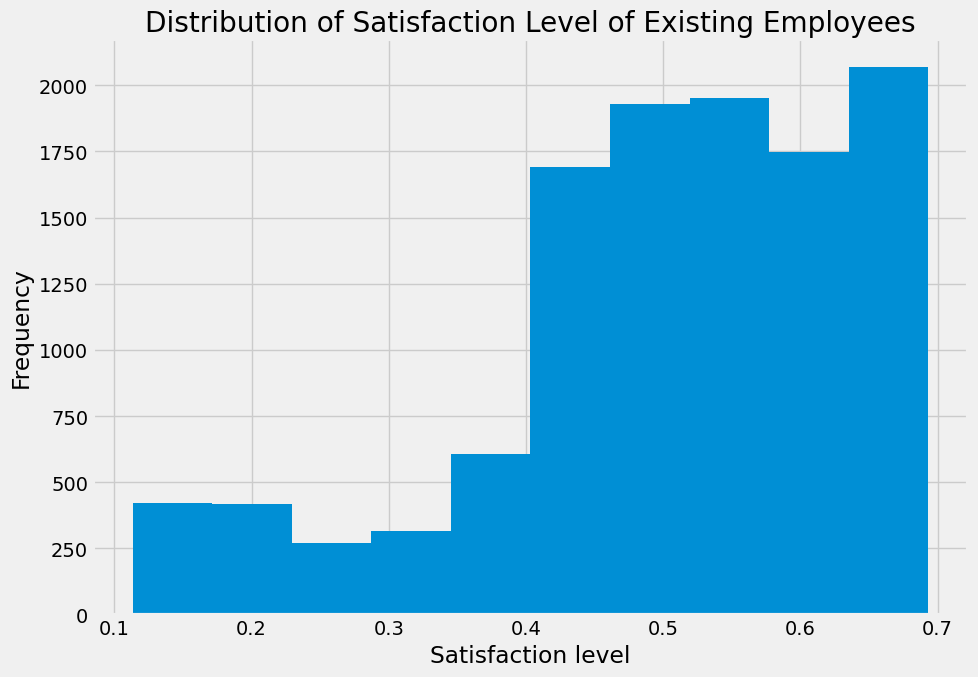

In [118]:
plt.figure(figsize=(10,7))
(np.log(exist['satisfaction_level'] + 1)).plot.hist()
plt.title("Distribution of Satisfaction Level of Existing Employees")
plt.xlabel('Satisfaction level')
plt.ylabel("Frequency")
plt.tight_layout()

Having established that satisfaction level of those that left was averagely low, it is important to have a valid statistics of the proportion of the employees that left who were in this category

In [119]:
# To determine the percentage of employees that left had a satisfaction level < 45
(len(left[left['satisfaction_level']<0.45])/len(left)) * 100

64.57574908989079

From the output we see that about `65%` of those that left had less than `45%` satisfaction level which needs to be questioned

This insights create a curiosity of determining a factor that might have influenced the low satisfaction level, `Promotion` was a factor thought of by intuition which prompted a deeper analysis to determine the proportion of those who left that had less than 45% and their promotion status

In [120]:
(left[left['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

From the result displayed, we see that `99%` of employees that left who had less than `45%` satisfaction level were not promoted in the last 5  years which can be assumed to be a major factor why they left

Another factor to check for this employees in this category range is their `Salary range`

In [121]:
#To determine the Salary proportion of Employees with less than 45% Satisfaction level
(left[left['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

From the result of the analysis, it can be seen that about `61%` of them were low income earners.

Through the insights obtained from the employees that left, it is expedient to check and validate the state of the current employee

In [122]:
#To determine the mean satisfaction level of employeees that exist
exist['satisfaction_level'].mean()*100

66.6809590479524

From the output we see that the average satisfaction level of those existing is around `70%`. Hence, using the metrics of employee that left as an insights to checkmate existing employees who are prone to leave considering their status

In [123]:
print (str((len(exist[exist['satisfaction_level']<0.45])/len(exist)) * 100) + '%' + ' of employees that exist have satisfaction level less than 45%')

exist[exist['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True)*100

13.816940847042353% of employees that exist have satisfaction level less than 45%


No     97.720076
Yes     2.279924
Name: promotion_last_5years, dtype: float64

From the `13%` of employees with less than 45% satisfaction level, we see that about `98%` has experienced no promotion in the last 5 years'

In [124]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,No,No,sales,low
1,2,0.80,0.86,5,262,6,No,No,sales,medium
2,3,0.11,0.88,7,272,4,No,No,sales,medium
3,4,0.72,0.87,5,223,5,No,No,sales,low
4,5,0.37,0.52,2,159,3,No,No,sales,low


### Last Evaluation

<Axes: title={'center': 'Distribution of Last Evaluation of Employees Existing'}, ylabel='Frequency'>

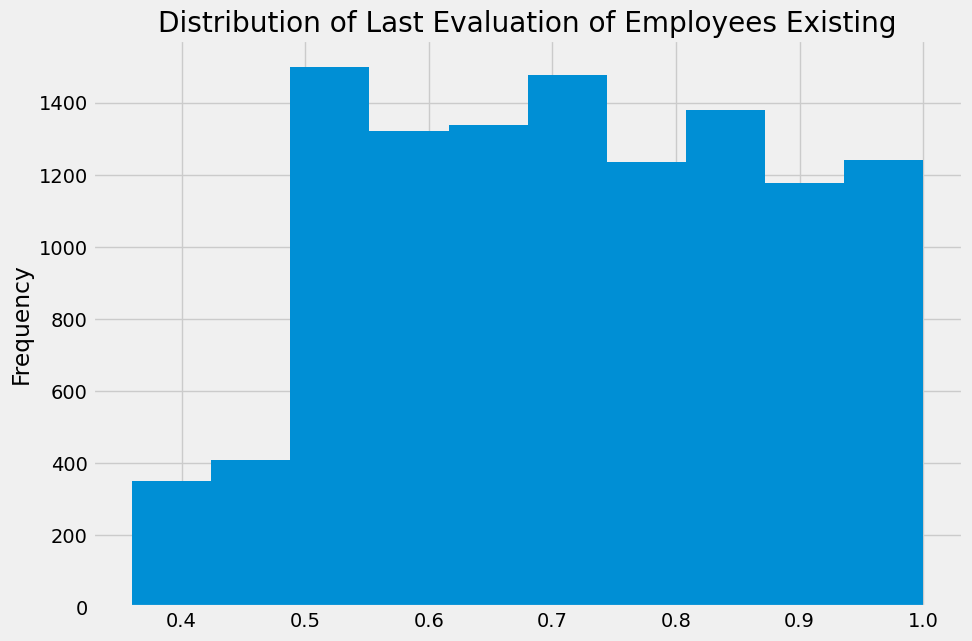

In [125]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees Existing")
exist['last_evaluation'].plot.hist()

<Axes: title={'center': 'Distribution of Last Evaluation of Employees that left'}, ylabel='Frequency'>

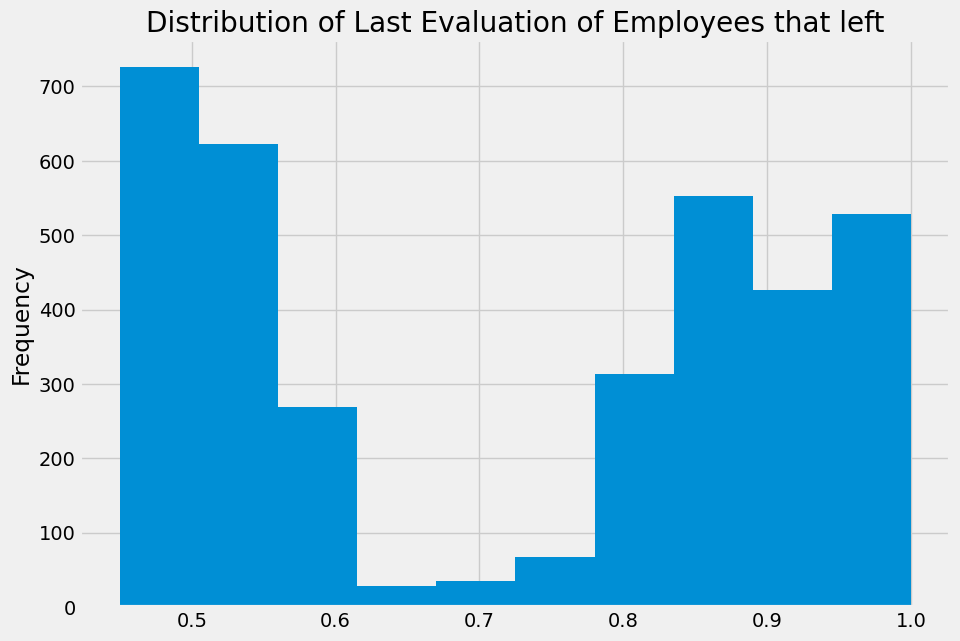

In [126]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees that left")
left['last_evaluation'].plot.hist()

In [127]:
#To determine the mean and median last evaluation of both employees to determine any pattern
left['last_evaluation'].median(), left['last_evaluation'].mean()

(0.79, 0.7181125735088211)

In [128]:
exist['last_evaluation'].median(),exist['last_evaluation'].mean()

(0.71, 0.7154733986699335)

From the output above for last evaluation, we see no special trends and patterns which further stirs up a more analysis to determine if there is a hidden insights

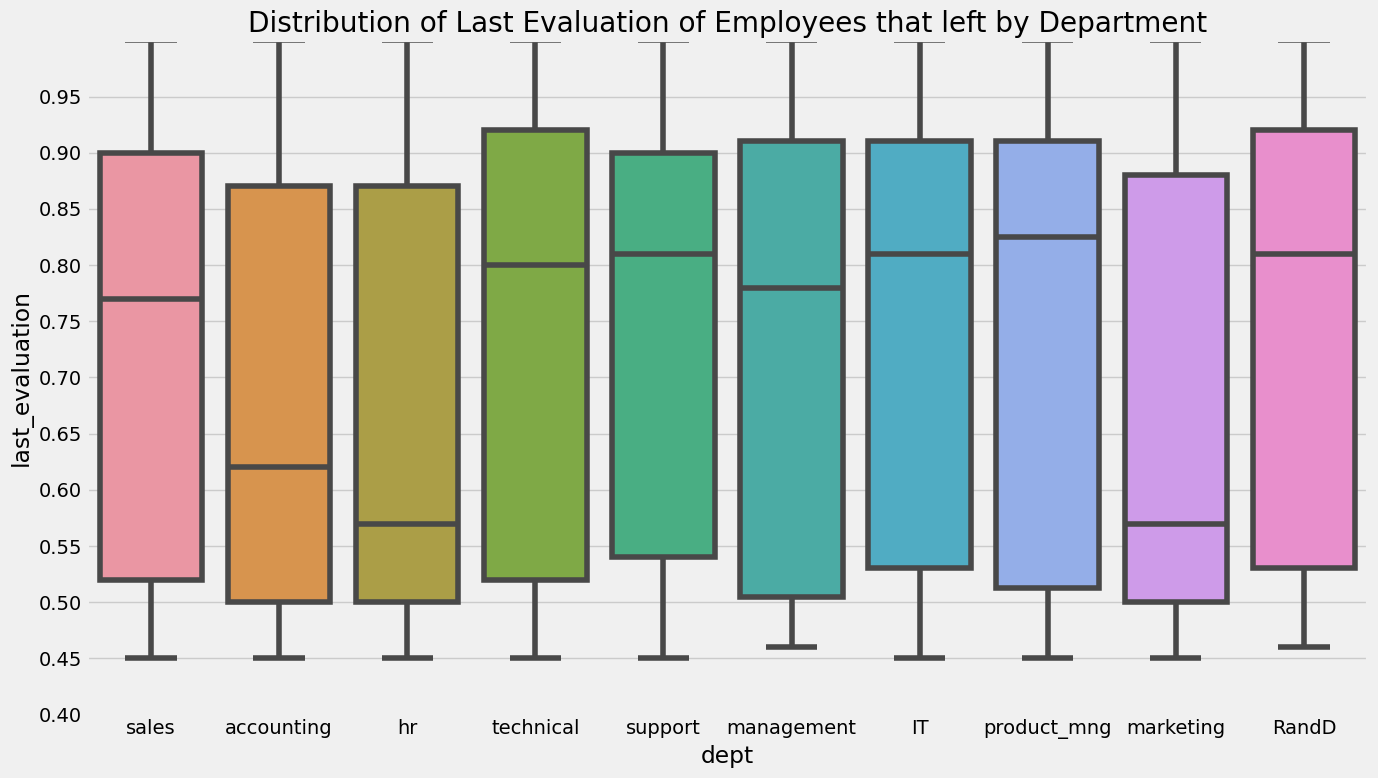

In [129]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=left)
plt.title("Distribution of Last Evaluation of Employees that left by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

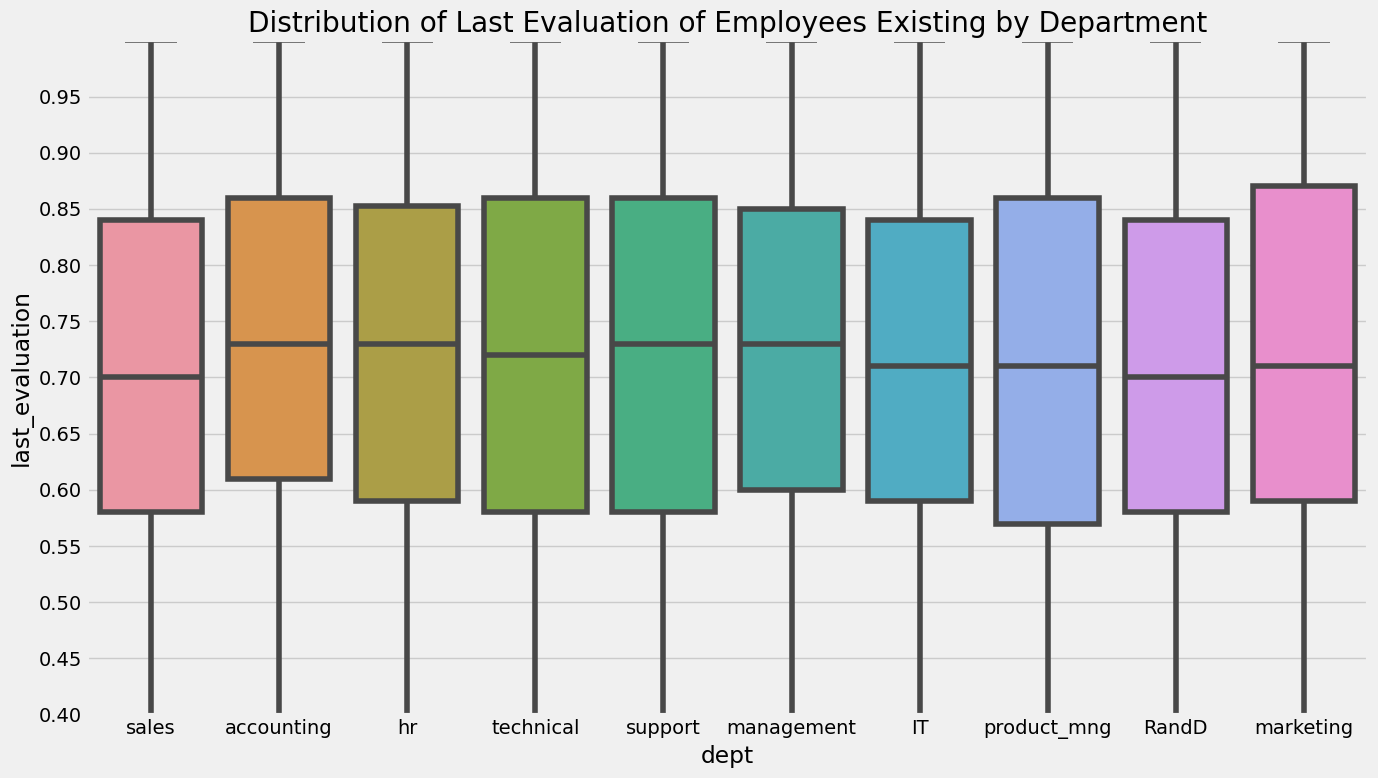

In [130]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=exist)
plt.title("Distribution of Last Evaluation of Employees Existing by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

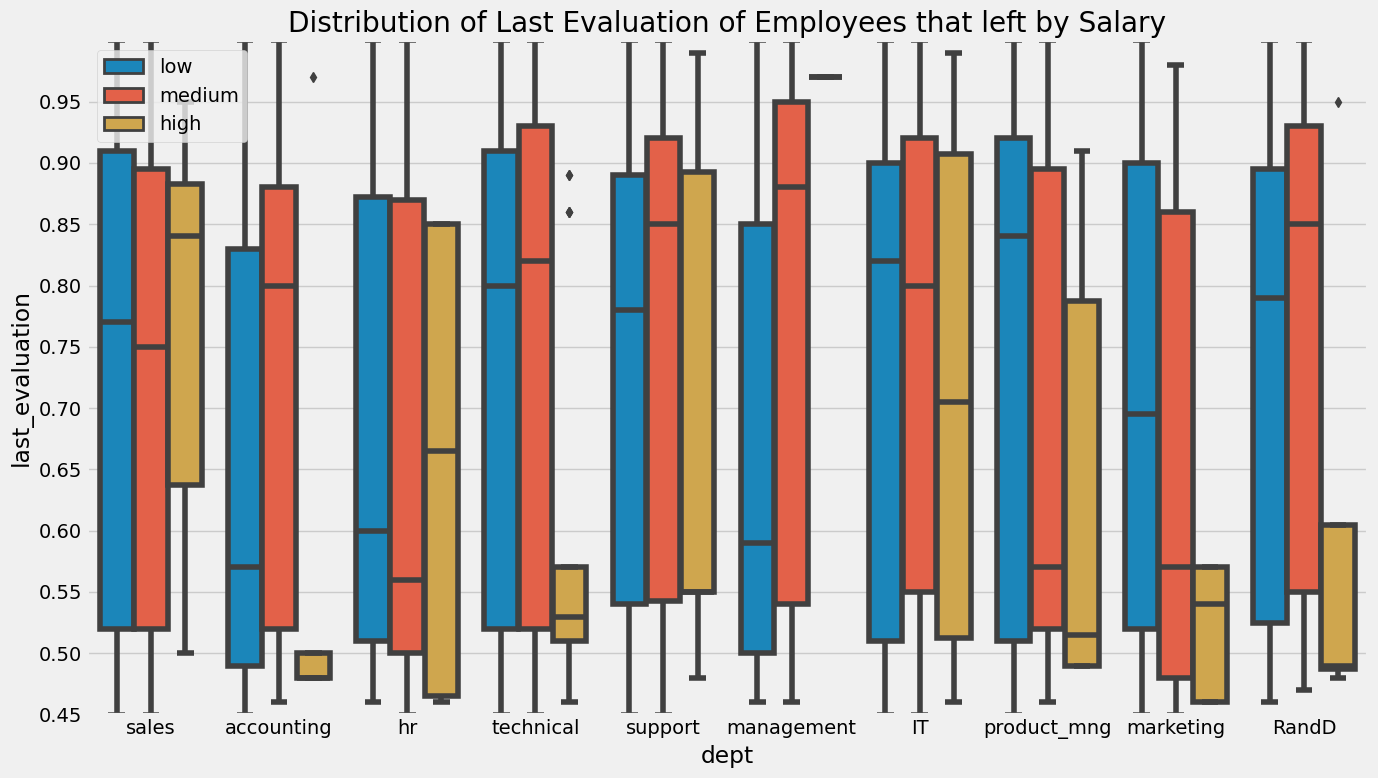

In [131]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=left)
plt.title("Distribution of Last Evaluation of Employees that left by Salary")
plt.ylim([0.45,1])
plt.yticks(np.arange(0.45, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

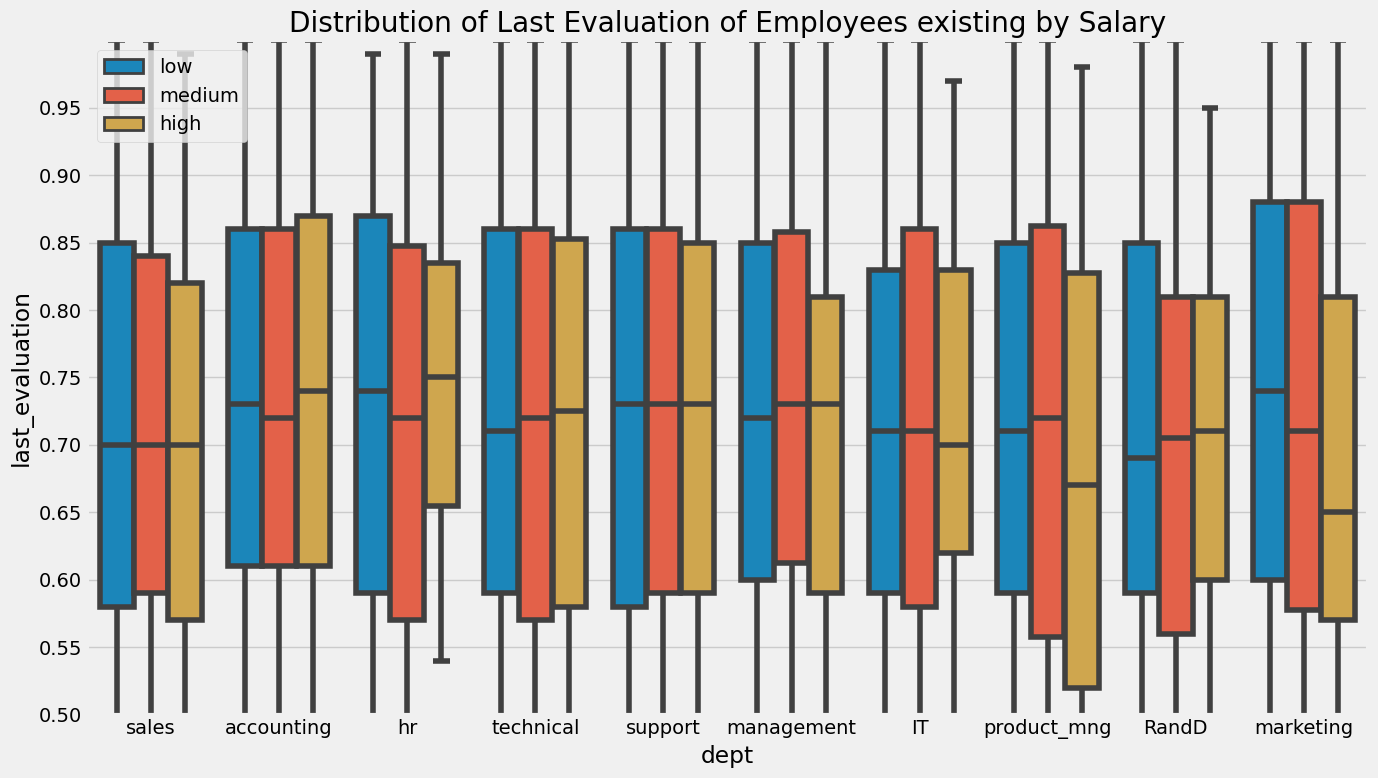

In [132]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=exist)
plt.title("Distribution of Last Evaluation of Employees existing by Salary")
plt.ylim([0.5,1])
plt.yticks(np.arange(0.5, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

## Bi/Multivariant Analysis

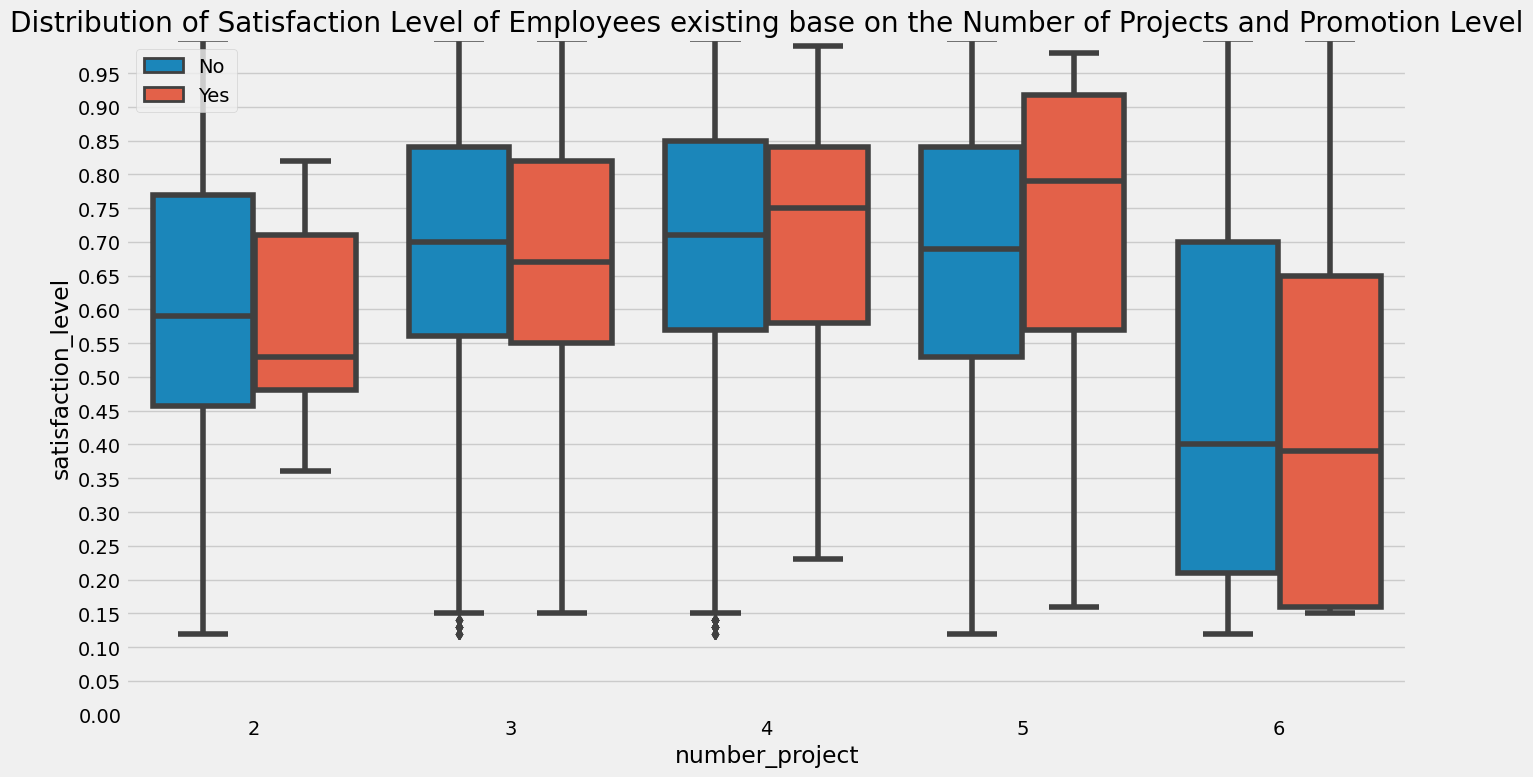

In [133]:
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=exist)
plt.title("Distribution of Satisfaction Level of Employees existing base on the Number of Projects and Promotion Level")
plt.tight_layout()
plt.legend(loc=2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

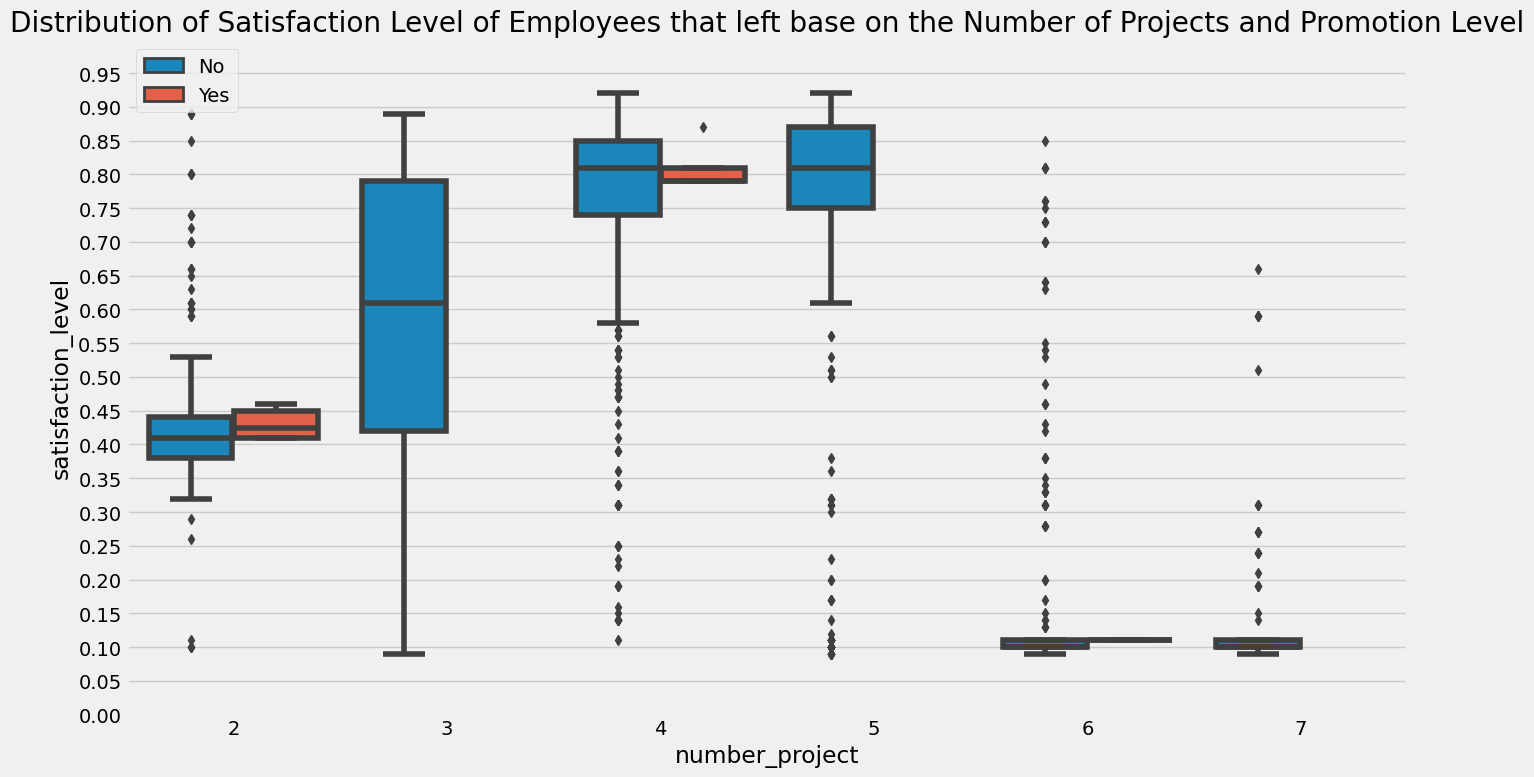

In [134]:
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=left)
plt.title("Distribution of Satisfaction Level of Employees that left base on the Number of Projects and Promotion Level")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

The display above further strengthens the insights discovered that a good percentage of employees that left had a low satisfaction level and a large percentage of them had no promotion in the last five(5) years.


Also, creating a cluster from the data base on salary range and analyze as shown below

In [135]:
#Employees that left
low_income= left[left['salary'] =='low']
medium_income = left[left['salary']=='medium']
high_income = left[left['salary']=='high']

#Exist Employees
low_income1= exist[exist['salary'] =='low']
medium_income1 = exist[exist['salary']=='medium']
high_income1 = exist[exist['salary']=='high']

Text(0.5, 0, 'Satisfaction level')

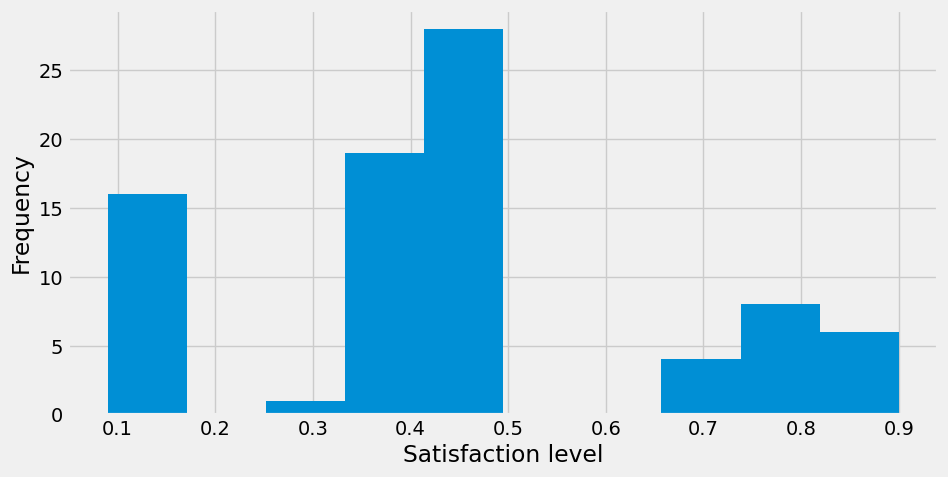

In [136]:
plt.figure(figsize=(10,5))
high_income['satisfaction_level'].plot.hist()
plt.xlabel('Satisfaction level')

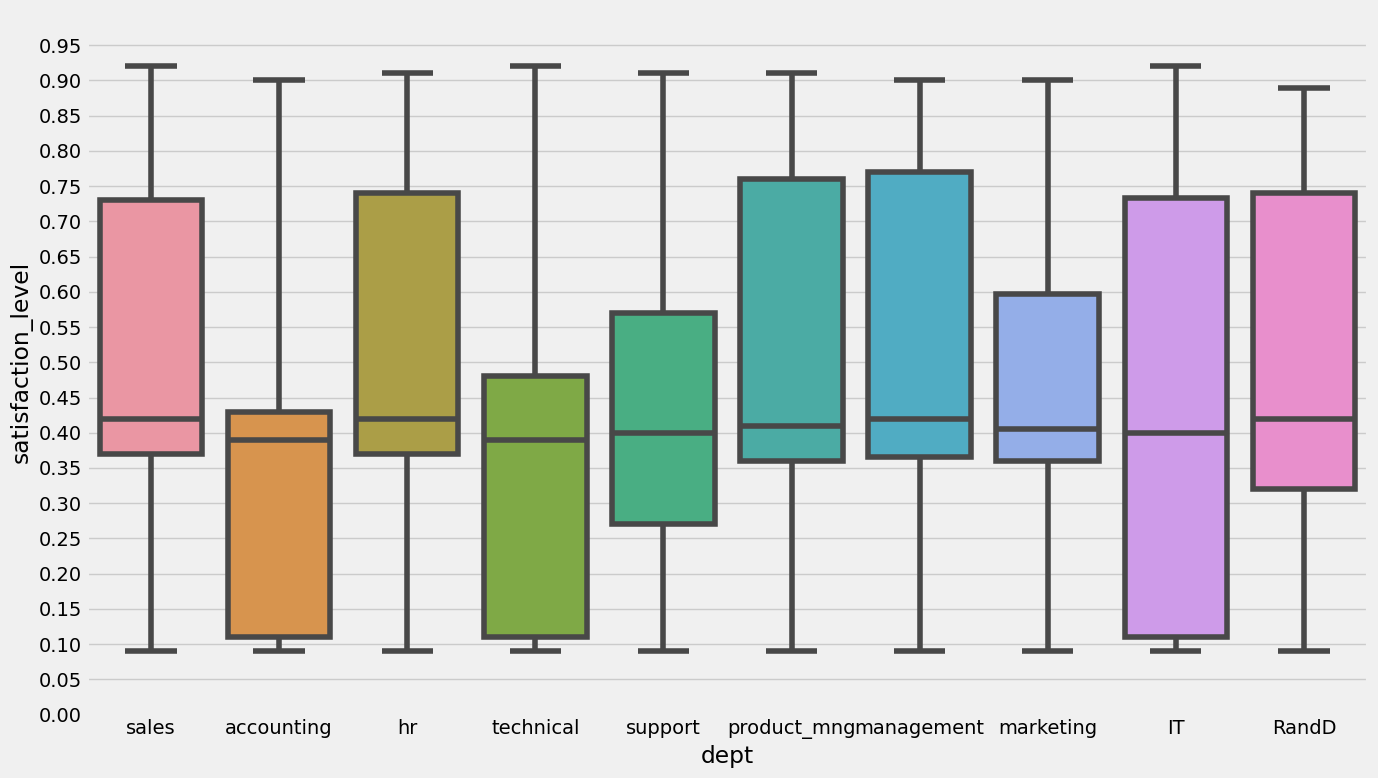

In [137]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=low_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

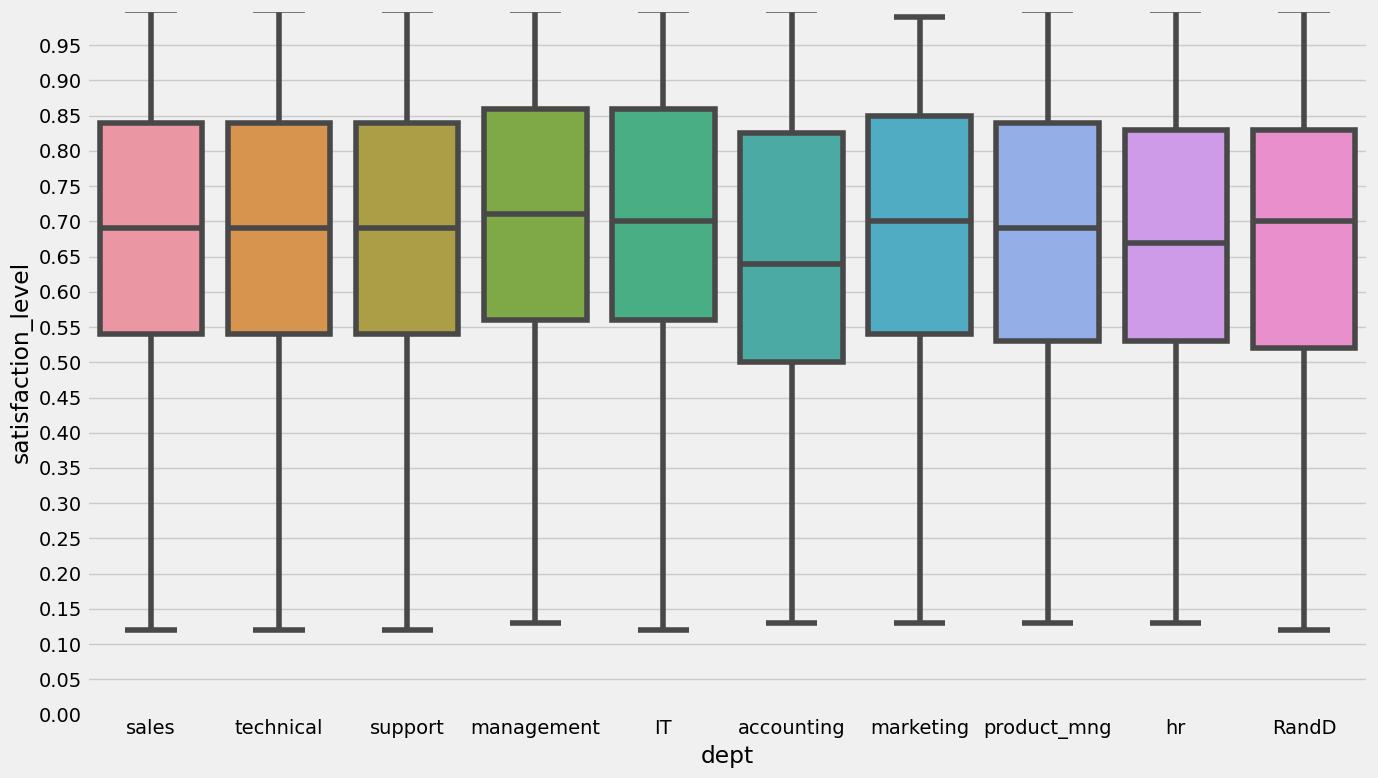

In [138]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=low_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

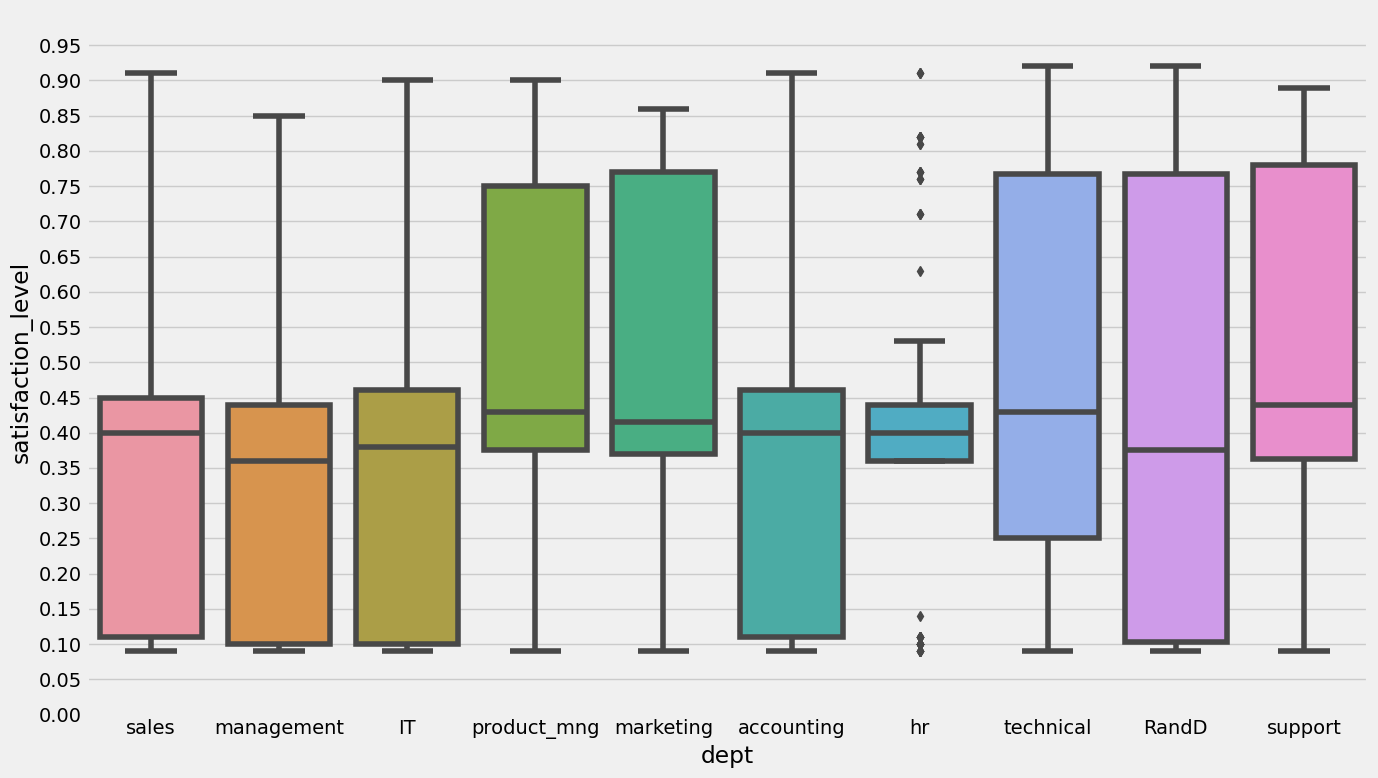

In [139]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=medium_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

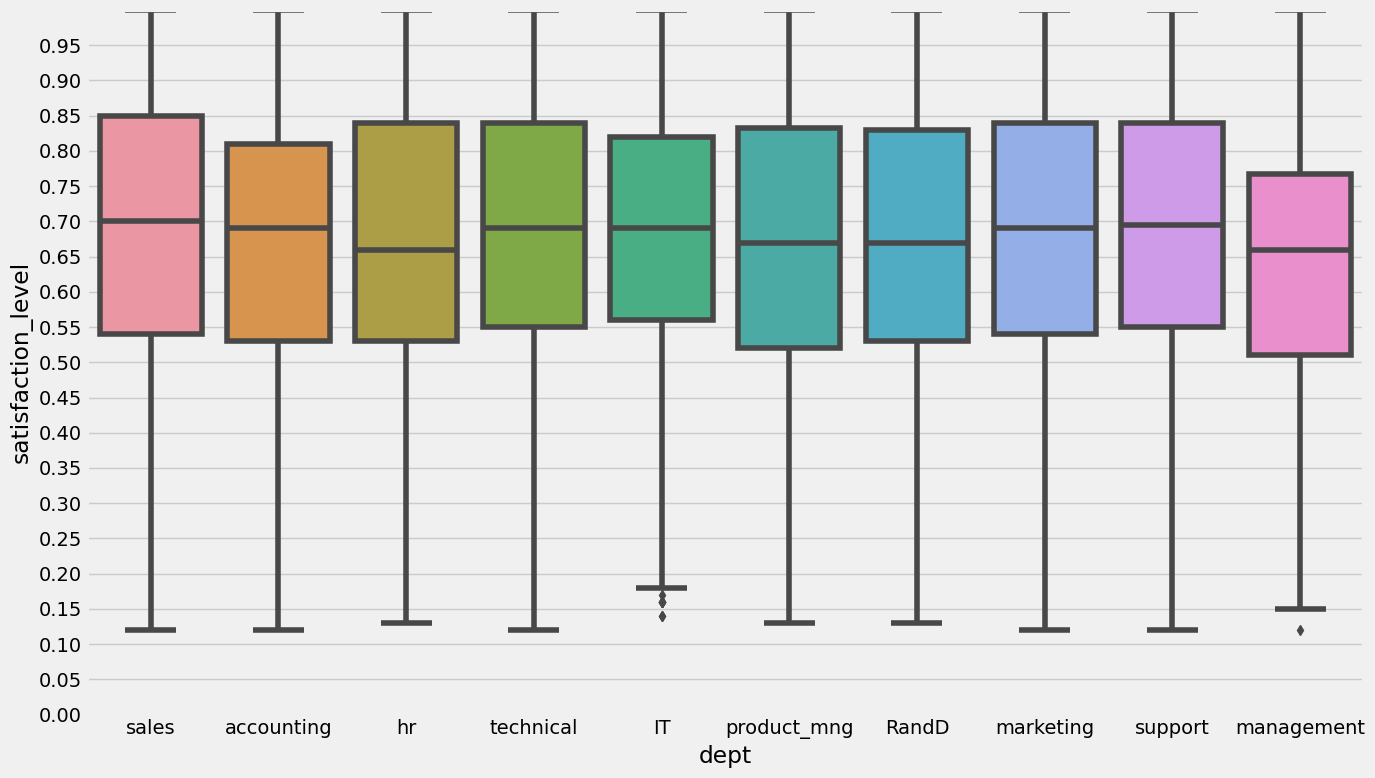

In [140]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=medium_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

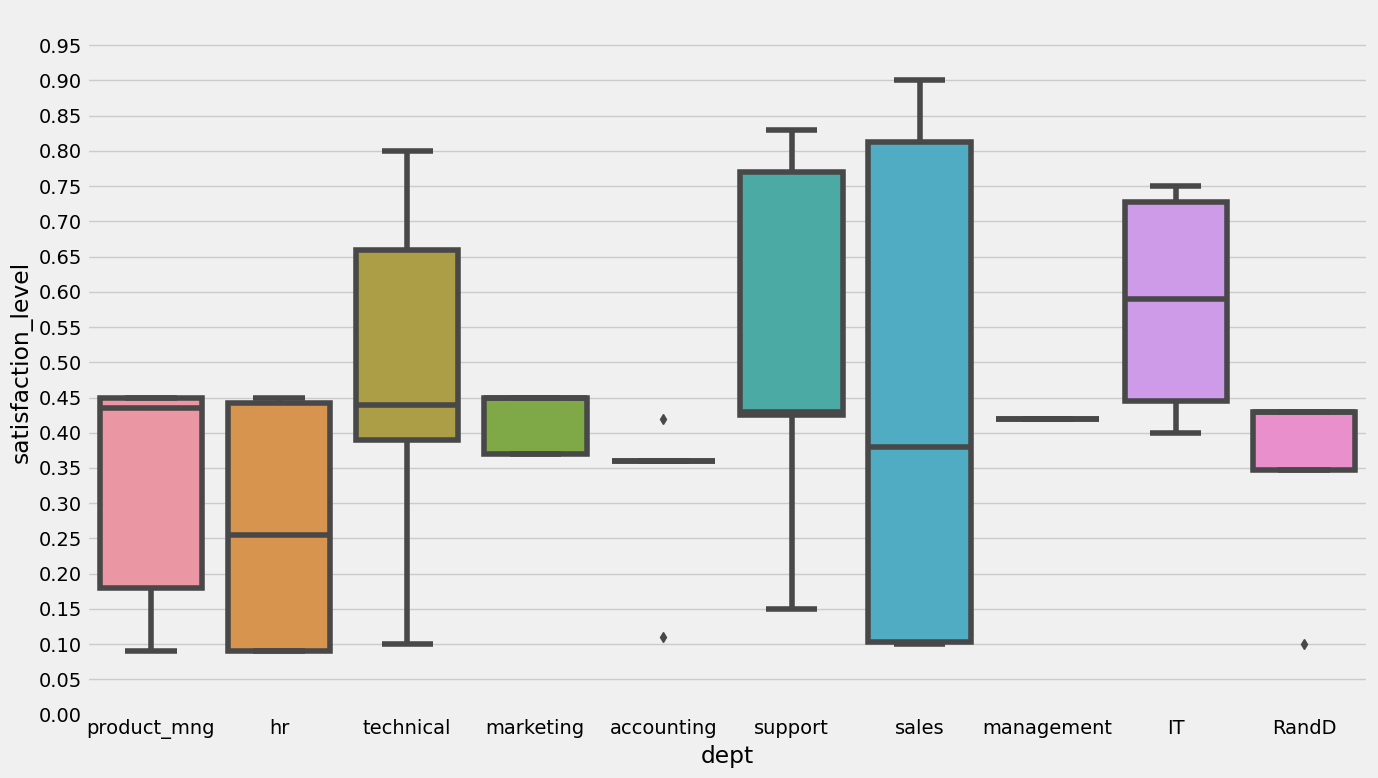

In [141]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=high_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

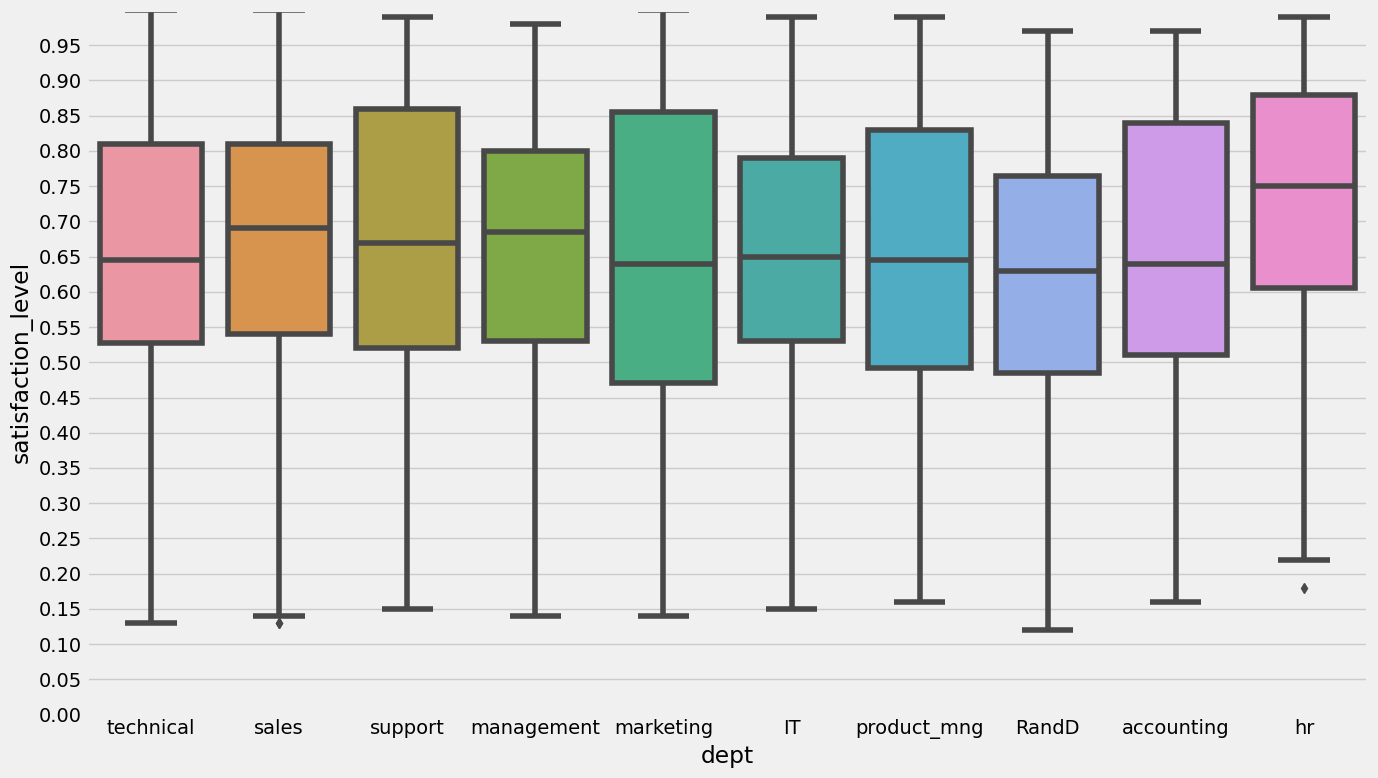

In [142]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=high_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

A thorough analysis in the cluster of salary range of both existing and employees that left, it can be deduced that across different salary ranges for employees that left, their `Satisfaction Level` was less than `45%` while for existing employees their satisfaction level was fair above `60%` across the different salary range. This gives us a strong conviction that satisfaction level is a key factor and determinant in explaining the type of employees that left and also employees that are prone to leave using this metric

Text(0.5, 1.0, 'Satisfaction Level of employees that left base on Salary and Work accident')

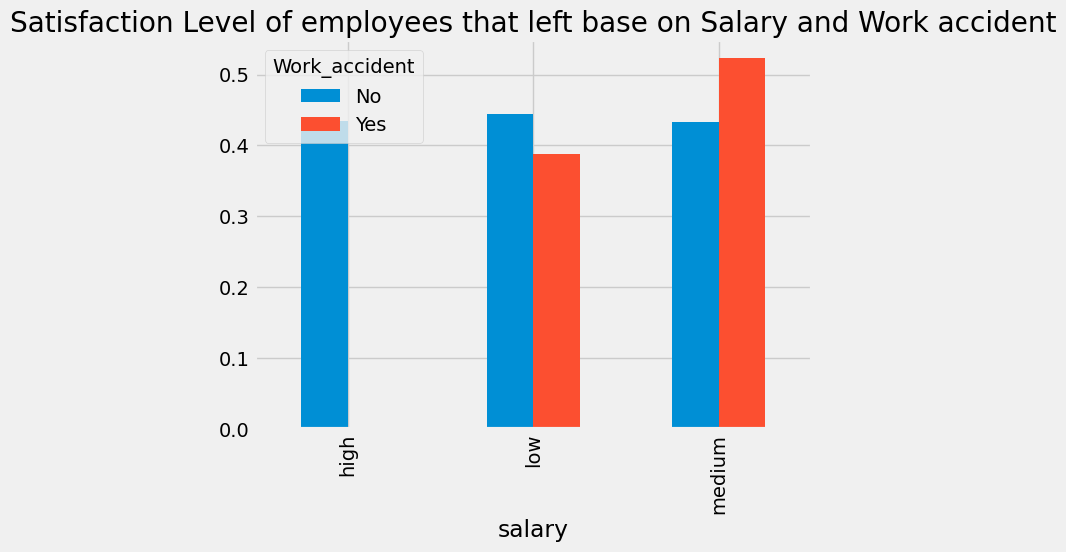

In [143]:
Acci_left =left.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_left.plot.bar()
plt.title("Satisfaction Level of employees that left base on Salary and Work accident")

Text(0.5, 1.0, 'Satisfaction Level of employees existing base on Salary and Work accident')

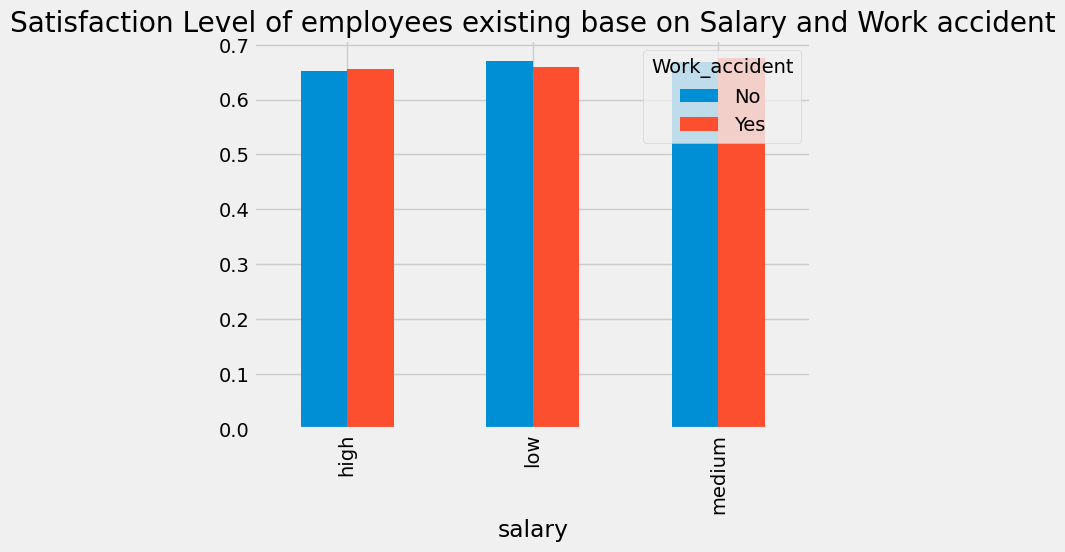

In [144]:
Acci_exist =exist.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_exist.plot.bar()
plt.title("Satisfaction Level of employees existing base on Salary and Work accident")

Text(0, 0.5, 'Satisfaction Level')

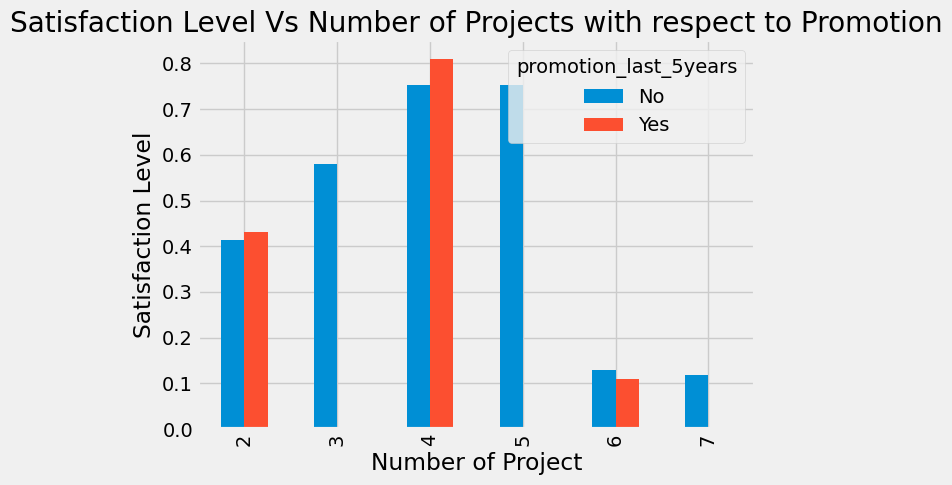

In [145]:
proj_left =left.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_left.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")


Text(0, 0.5, 'Satisfaction Level')

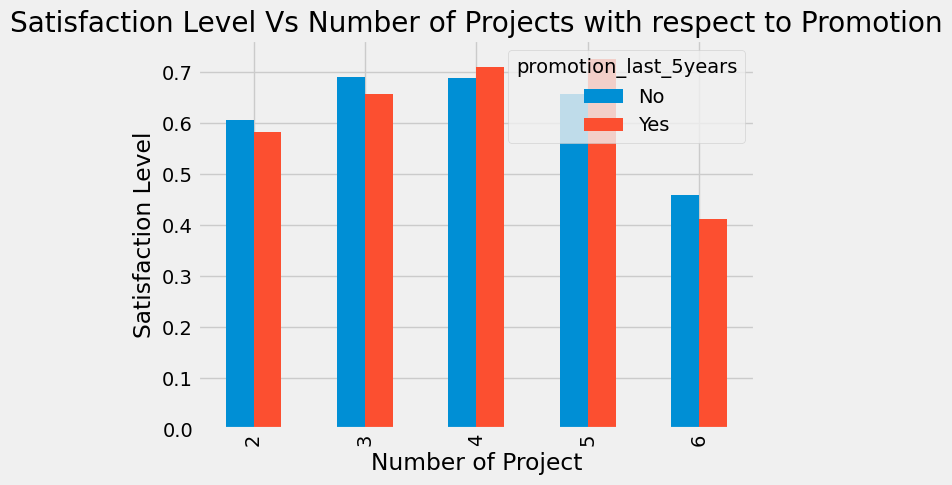

In [146]:
proj_exist =exist.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_exist.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")


From the output displayed above, the following can be deduced

1. As the number of project taken by employees who left was greater than 4, the satisfaction level begins to drop which can also be seen as a trend for the current employees. Hence, as a suggestion to further maintain a high satisfaction level of employees, the company should ensure the number of projects allocated to an employee is not too overwhelming thereby losing enthusiasm which may result to seeing a need to leave

2. The salary structure of those that left who had work accident was within the Low and medium range which when analyzed from satisfaction level point their satisfaction level was approximately 50%. However,  checking this information with those still in the company it was discovered that their salary was distributed into low, medium and high range which further improved satisfaction level.  This let us see that the company maintained a good salary structure for those that had work accidents.
